In [1]:
import pandas as pd
#pandas
import numpy as np
#numpy
import matplotlib.pyplot as plt
#matplotlib
import seaborn as sns
#seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#sklearn
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
#keras
import tensorflow as tf
#tensorflow
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import re
import os
#other useful stuff
from wordcloud import WordCloud, STOPWORDS
#wordclouds and cloud stopwords
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


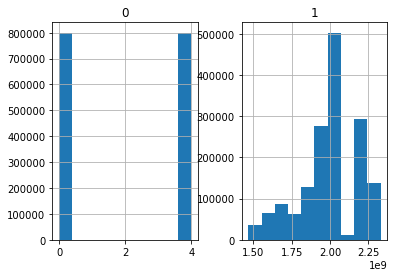

In [2]:
data = pd.read_csv('./data/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header=None)
data.info()
data.hist()
data.head(10)

In [3]:
df = data.sample(frac=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1230762 to 818847
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  int64 
 2   2       200000 non-null  object
 3   3       200000 non-null  object
 4   4       200000 non-null  object
 5   5       200000 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


,0,1,2,3,4,5
1230762,4,1991625042,Mon Jun 01 07:22:36 PDT 2009,NO_QUERY,alexisnotfunny,"Also, it is raining I love sleeping with rain..."
1549072,4,2183227223,Mon Jun 15 14:13:04 PDT 2009,NO_QUERY,nicolacourtney,"@JessyO haha no, not fit flops! cheap ones fro..."
1217244,4,1989719188,Mon Jun 01 02:33:56 PDT 2009,NO_QUERY,kristinatamin,had tiring weekend.. but she had fun.. lots of...
1550981,4,2183916116,Mon Jun 15 15:09:41 PDT 2009,NO_QUERY,ksutt11,no you cant have a world war 3 if there's only...
758178,0,2295634133,Tue Jun 23 08:10:46 PDT 2009,NO_QUERY,VASQUEZROSA,i dont feel that great today drinking a lot o...
1385488,4,2052752975,Sat Jun 06 01:53:24 PDT 2009,NO_QUERY,SHEMA_Gurls,Have the audacity to smile this morning ... I...
225572,0,1977666772,Sat May 30 21:26:32 PDT 2009,NO_QUERY,MrsCullen38,@mileycyrus dnt say that u shouldn't cry
469650,0,2176259634,Mon Jun 15 03:22:24 PDT 2009,NO_QUERY,TwinerdMandy,YAY that went really well!! Cant wait for Weds...
1125252,4,1974810739,Sat May 30 13:53:12 PDT 2009,NO_QUERY,jfrydakis,"http://twitpic.com/6a9em - at a Terrace party,..."
1210146,4,1989013209,Mon Jun 01 00:03:56 PDT 2009,NO_QUERY,blindcripple,@hanlie Morning And same to you


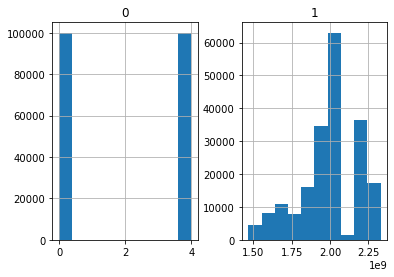

In [4]:
df = df[:int(round(len(df)/8))]
df.info()
df.hist()
df.head(10)

In [5]:
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})
df.head(1)

,target,id,date,query,username,content
1230762,4,1991625042,Mon Jun 01 07:22:36 PDT 2009,NO_QUERY,alexisnotfunny,"Also, it is raining I love sleeping with rain..."


In [6]:
df.isnull().sum() # Hiányzó értékek ellenőrzése

target      0
id          0
date        0
query       0
username    0
content     0
dtype: int64

In [7]:
df.target = df.target.replace({4: 1})
df.head(10)

,target,id,date,query,username,content
1230762,1,1991625042,Mon Jun 01 07:22:36 PDT 2009,NO_QUERY,alexisnotfunny,"Also, it is raining I love sleeping with rain..."
1549072,1,2183227223,Mon Jun 15 14:13:04 PDT 2009,NO_QUERY,nicolacourtney,"@JessyO haha no, not fit flops! cheap ones fro..."
1217244,1,1989719188,Mon Jun 01 02:33:56 PDT 2009,NO_QUERY,kristinatamin,had tiring weekend.. but she had fun.. lots of...
1550981,1,2183916116,Mon Jun 15 15:09:41 PDT 2009,NO_QUERY,ksutt11,no you cant have a world war 3 if there's only...
758178,0,2295634133,Tue Jun 23 08:10:46 PDT 2009,NO_QUERY,VASQUEZROSA,i dont feel that great today drinking a lot o...
1385488,1,2052752975,Sat Jun 06 01:53:24 PDT 2009,NO_QUERY,SHEMA_Gurls,Have the audacity to smile this morning ... I...
225572,0,1977666772,Sat May 30 21:26:32 PDT 2009,NO_QUERY,MrsCullen38,@mileycyrus dnt say that u shouldn't cry
469650,0,2176259634,Mon Jun 15 03:22:24 PDT 2009,NO_QUERY,TwinerdMandy,YAY that went really well!! Cant wait for Weds...
1125252,1,1974810739,Sat May 30 13:53:12 PDT 2009,NO_QUERY,jfrydakis,"http://twitpic.com/6a9em - at a Terrace party,..."
1210146,1,1989013209,Mon Jun 01 00:03:56 PDT 2009,NO_QUERY,blindcripple,@hanlie Morning And same to you


In [8]:
df['target'] = df['target'].replace([0, 1],['Negative','Positive'])

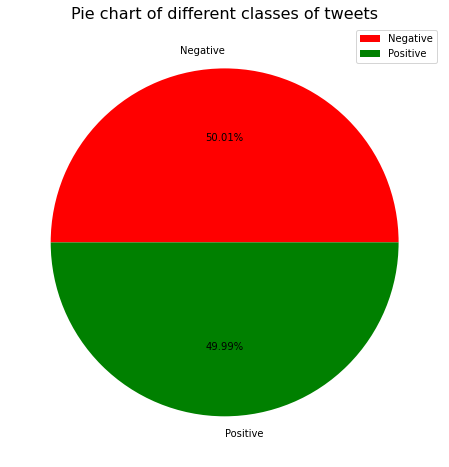

In [9]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

In [10]:
df['target'].value_counts()

Negative    100012
Positive     99988
Name: target, dtype: int64

In [11]:
df['length'] = df.content.str.split().apply(len)

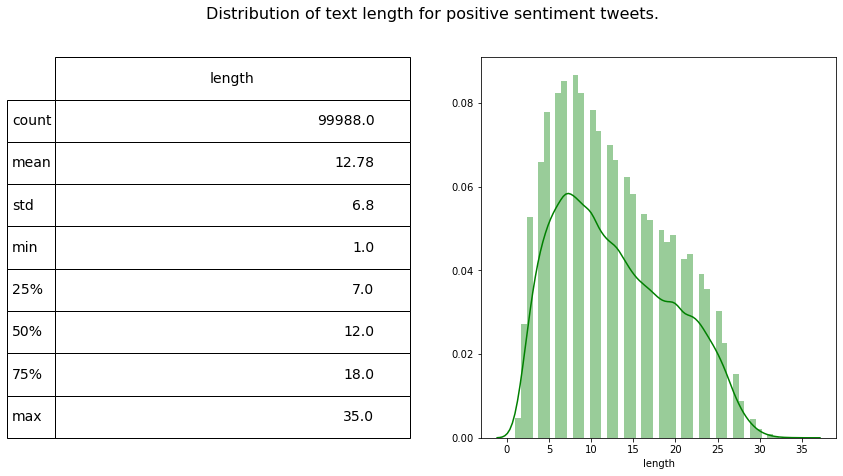

In [12]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(122)
sns.distplot(df[df['target']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.target=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

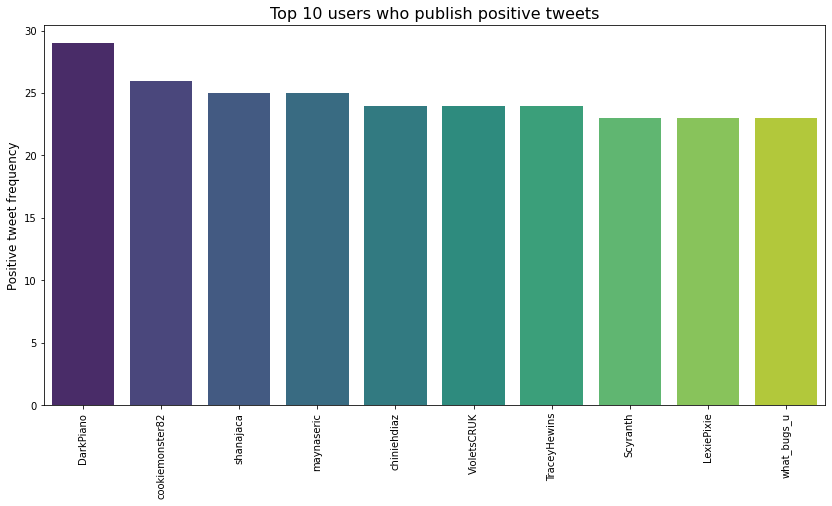

In [14]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['target']=='Positive']['username'].value_counts()[:10].index, \
                           y=df[df['target']=='Positive']['username'].value_counts()[:10],palette='viridis')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Positive tweet frequency',fontsize=12)
plt.title('Top 10 users who publish positive tweets',fontsize=16)
plt.show()

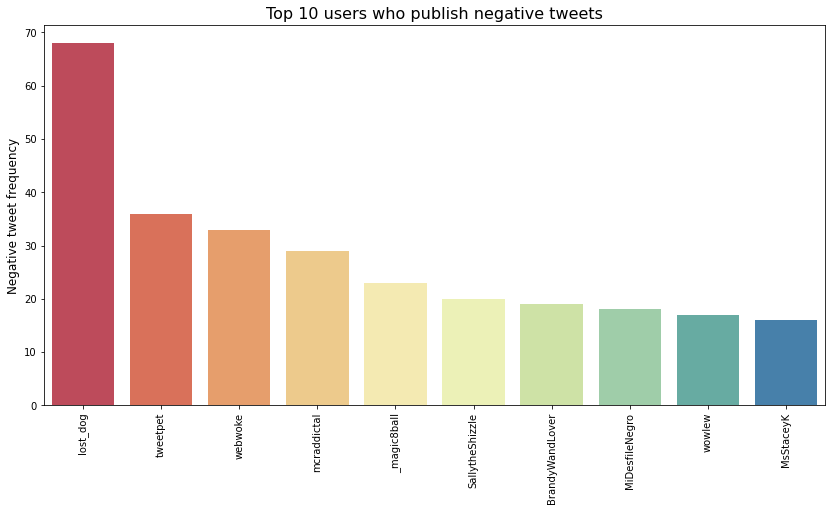

In [13]:
plt.figure(figsize=(14,7))
common_keyword=sns.barplot(x=df[df['target']=='Negative']['username'].value_counts()[:10].index, \
                           y=df[df['target']=='Negative']['username'].value_counts()[:10],palette='Spectral')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Negative tweet frequency',fontsize=12)
plt.title('Top 10 users who publish negative tweets',fontsize=16)
plt.show()

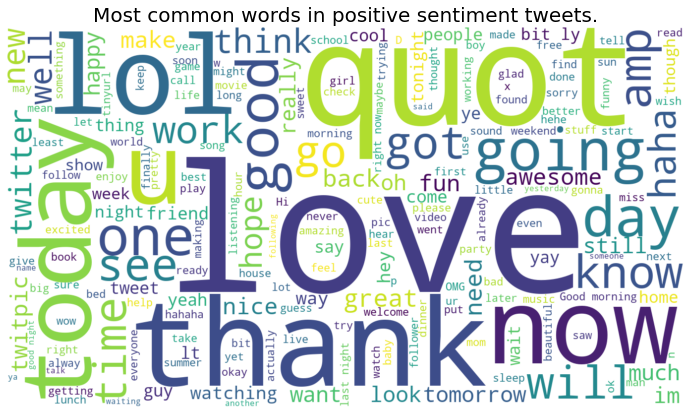

In [14]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.target=='Positive'].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive sentiment tweets.',fontsize=20)
plt.show()

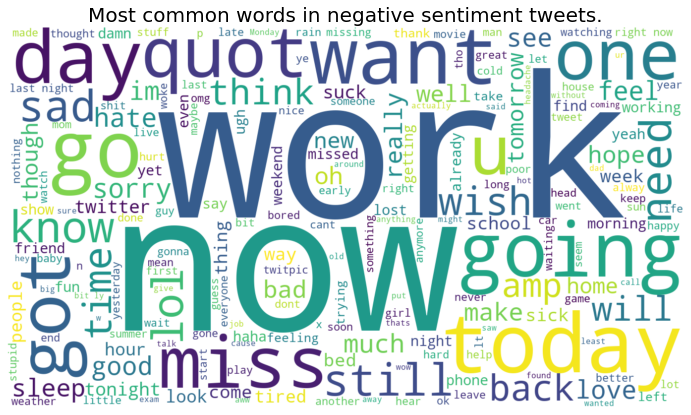

In [15]:
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.target=='Negative'].content))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative sentiment tweets.',fontsize=20)
plt.show()

In [16]:
df.drop(['id','date','query','username','length'], axis=1, inplace=True)
df.head()

,target,content
1230762,Positive,"Also, it is raining I love sleeping with rain..."
1549072,Positive,"@JessyO haha no, not fit flops! cheap ones fro..."
1217244,Positive,had tiring weekend.. but she had fun.. lots of...
1550981,Positive,no you cant have a world war 3 if there's only...
758178,Negative,i dont feel that great today drinking a lot o...


In [17]:
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets

In [18]:
def preprocess(content, stem=False):
  content = re.sub(regex, ' ', str(content).lower()).strip()
  tokens = []
  for token in content.split():
    if token not in english_stopwords:
      tokens.append(stemmer.stem(token))
  return " ".join(tokens)

In [19]:
df.content = df.content.apply(lambda x: preprocess(x))
df.head()

,target,content
1230762,Positive,also rain love sleep rain background good nigh...
1549072,Positive,haha fit flop cheap one evil walmart
1217244,Positive,tire weekend fun lot fun heck thank keno
1550981,Positive,cant world war 3 one side fight lt 3 jonasbroth
758178,Negative,dont feel great today drink lot tea


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A88E57BC10>]],
      dtype=object)

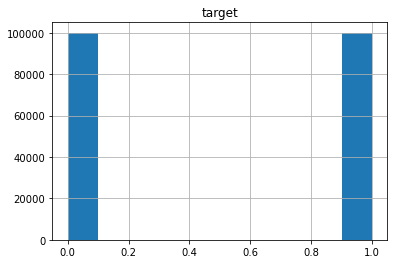

In [20]:
df.target = df.target.replace({'Positive': 1, 'Negative': 0})
df.hist()

In [21]:

train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

print('Train dataset shape: {}'.format(train.shape))
print('Validation dataset shape: {}'.format(validate.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (120000, 2)
Validation dataset shape: (40000, 2)
Test dataset shape: (40000, 2)


In [22]:

tokenizer = BertWordPieceTokenizer("./data/bert-base-uncased-vocab.txt",
                                   lowercase=True)

def bert_tokenizer(data):
    result = []
    for item in data:
        result.append(tokenizer.encode(item).ids)
    
    return np.array(result)

In [23]:
#import tensorflow as tf

maxlen = 128

X_train = list(train["content"].values)
X_train = bert_tokenizer(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
y_train = train["target"].values

X_val = list(validate["content"].values)
X_val = bert_tokenizer(X_val)
y_val = validate["target"].values
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)

X_test = list(test["content"].values)
X_test = bert_tokenizer(X_test)
y_test = test["target"].values
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [24]:
print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  101 6904 2213 2112 2072 7570
 2271  102]


In [25]:

max_features = 30523  # vocab size


model_bert = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 8, input_length=maxlen),
    tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)),
    tf.keras.layers.Dense(1, activation='sigmoid'),
]) 

model_bert.compile(optimizer='adam', loss="binary_crossentropy", metrics=['binary_accuracy'])

model_bert.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 128, 8)            244184    
_________________________________________________________________
bidirectional (Bidirectional (None, 128, 64)           10496     
_________________________________________________________________
dense (Dense)                (None, 128, 1)            65        
Total params: 254,745
Trainable params: 254,745
Non-trainable params: 0
_________________________________________________________________


In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=2)
history = model_bert.fit(X_train, 
                        y_train,
                        epochs=10,
                        batch_size=32,
                        callbacks=[callback],
                        validation_data=(X_val, y_val))

Epoch 1/10
3750/3750 [==============================] - 271s 71ms/step - loss: 0.6473 - binary_accuracy: 0.6136 - val_loss: 0.5724 - val_binary_accuracy: 0.7302
Epoch 2/10
3750/3750 [==============================] - 256s 68ms/step - loss: 0.5540 - binary_accuracy: 0.7477 - val_loss: 0.5977 - val_binary_accuracy: 0.6084
Epoch 3/10
3750/3750 [==============================] - 242s 64ms/step - loss: 0.5628 - binary_accuracy: 0.7137 - val_loss: 0.6740 - val_binary_accuracy: 0.5539


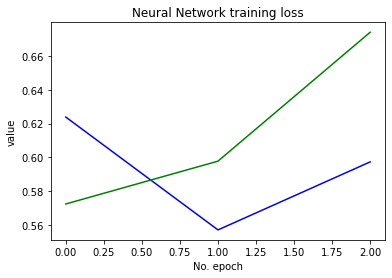

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='(training data)',color='blue')
plt.plot(history.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

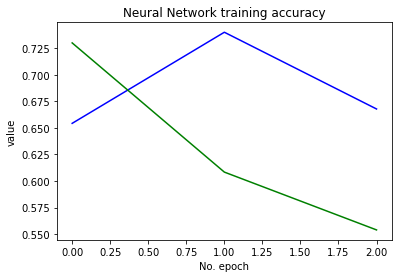

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'], label='(training data)',color='blue')
plt.plot(history.history['val_binary_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [29]:

max_features = 30523  # vocab size


modelb = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 8, input_length=maxlen),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid'),
]) 

modelb.compile(optimizer='adam', loss="binary_crossentropy", metrics=['binary_accuracy'])

modelb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 128, 8)            244184    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 249,465
Trainable params: 249,465
Non-trainable params: 0
_________________________________________________________________


In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=2)
his = modelb.fit(X_train, 
                        y_train,
                        epochs=10,
                        batch_size=32,
                        callbacks=[callback],
                        validation_data=(X_val, y_val))

Epoch 1/10
3750/3750 [==============================] - 213s 56ms/step - loss: 0.5622 - binary_accuracy: 0.7024 - val_loss: 0.5015 - val_binary_accuracy: 0.7584
Epoch 2/10
3750/3750 [==============================] - 176s 47ms/step - loss: 0.4780 - binary_accuracy: 0.7722 - val_loss: 0.4972 - val_binary_accuracy: 0.7574
Epoch 3/10
3750/3750 [==============================] - 179s 48ms/step - loss: 0.4585 - binary_accuracy: 0.7835 - val_loss: 0.4963 - val_binary_accuracy: 0.7572


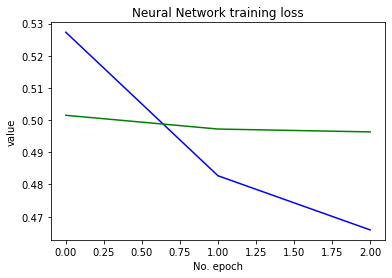

In [31]:
import matplotlib.pyplot as plt

plt.plot(his.history['loss'], label='(training data)',color='blue')
plt.plot(his.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

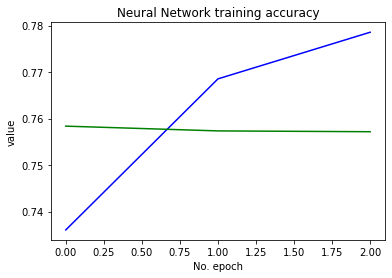

In [32]:
import matplotlib.pyplot as plt

plt.plot(his.history['binary_accuracy'], label='(training data)',color='blue')
plt.plot(his.history['val_binary_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [33]:
# Bidirectional és LSTM
results = model_bert.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

1250/1250 [==============================] - 26s 21ms/step - loss: 0.6742 - binary_accuracy: 0.5543
test loss, test acc: [0.6742063760757446, 0.5542882680892944]


In [34]:
# Csak LSTM
results = modelb.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results)

1250/1250 [==============================] - 20s 16ms/step - loss: 0.4976 - binary_accuracy: 0.7590
test loss, test acc: [0.4975570738315582, 0.7590000033378601]
